# Importing Libraries
### Purpose: Import necessary libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and machine learning tasks (from sklearn).
### train_test_split: To split the dataset into training and testing sets.
### StandardScaler: For feature scaling.
### KNeighborsClassifier: To build a KNN classification model.
### Metrics like classification_report, confusion_matrix, and roc_auc_score evaluate the model.

In [24]:
# Importing libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score
)

# Load and Explore the Dataset
### Load the Titanic dataset into a Pandas DataFrame.
### Use .head() to display the first 5 rows of the dataset.
### Use .info() to understand the structure of the dataset (column types, non-null counts).
### Check for missing values using .isnull().sum().


In [25]:
# Load the dataset
titanic_data = pd.read_csv("Titanic-Dataset.csv")


In [26]:
# Display the first few rows
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [27]:
# Check for missing values
print("\nMissing values:\n", titanic_data.isnull().sum())



Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Handling Missing Data
### Fill missing Age values with the median to avoid skewing the data.
### Fill missing Embarked values with the mode (most frequent value).
### Drop the Cabin column because it has too many missing values and may not add significant value to the analysis.

In [28]:
# Fill missing values for simplicity
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
if 'Cabin' in titanic_data.columns:
    titanic_data = titanic_data.drop(columns=['Cabin'], errors='ignore')  # Drop Cabin for simplicity


# Dropping Irrelevant Columns
### Drop columns like PassengerId, Name, and Ticket because they are irrelevant for modeling purposes.

In [29]:
# Drop irrelevant columns
titanic_data = titanic_data.drop(columns=["PassengerId", "Name", "Ticket"], errors='ignore')


# Encoding Categorical Variables
### Convert categorical variables (Sex and Embarked) into numerical values using LabelEncoder.
### For example, Sex is converted to 0 for "female" and 1 for "male."


In [30]:
# Encode categorical features
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Summary Statistics
### Use .describe() to view the summary statistics (mean, median, standard deviation, etc.) of the numerical features.

In [31]:
# Summary statistics of numerical features
print("\nSummary Statistics:")
print(titanic_data.describe())



Summary Statistics:
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean    32.204208    1.536476  
std     49.693429    0.791503  
min      0.000000    0.000000  
25%      7.910400    1.000000  
50%     14.454200    2.000000  
75%     31.000000    2.00

# Visualizing Correlations
### Plot a heatmap to visualize correlations between numerical features.
### High correlations with the target (Survived) can indicate which features are important for prediction.


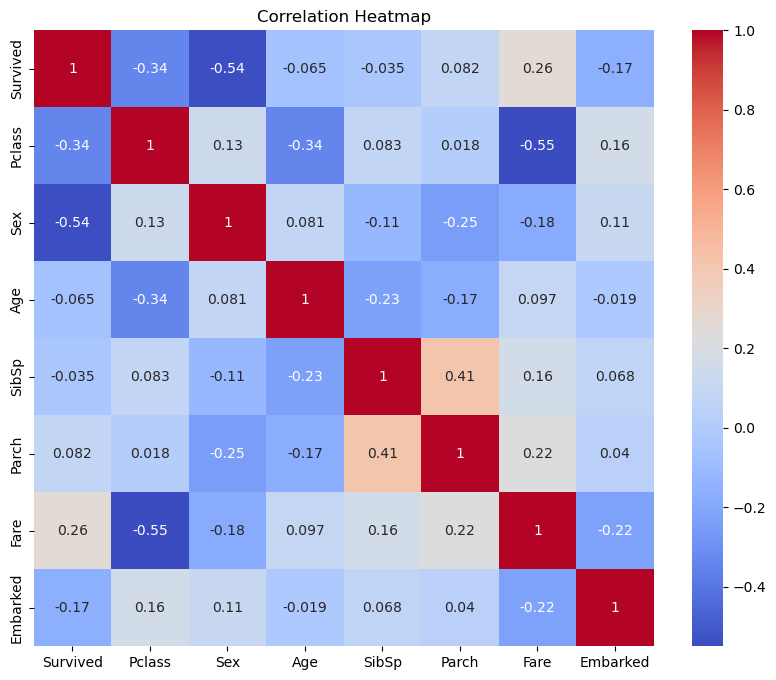

In [32]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Plot Histograms for Numerical Features
### Purpose: Visualize the distribution of numerical features (e.g., Age, Fare, etc.).
### You can check for skewness, outliers, or other anomalies in the data.
### bins=15: Number of bins in each histogram.
### figsize=(15, 10): Adjusts the overall size of the plot.
### color='skyblue' and edgecolor='black': Enhance plot aesthetics.


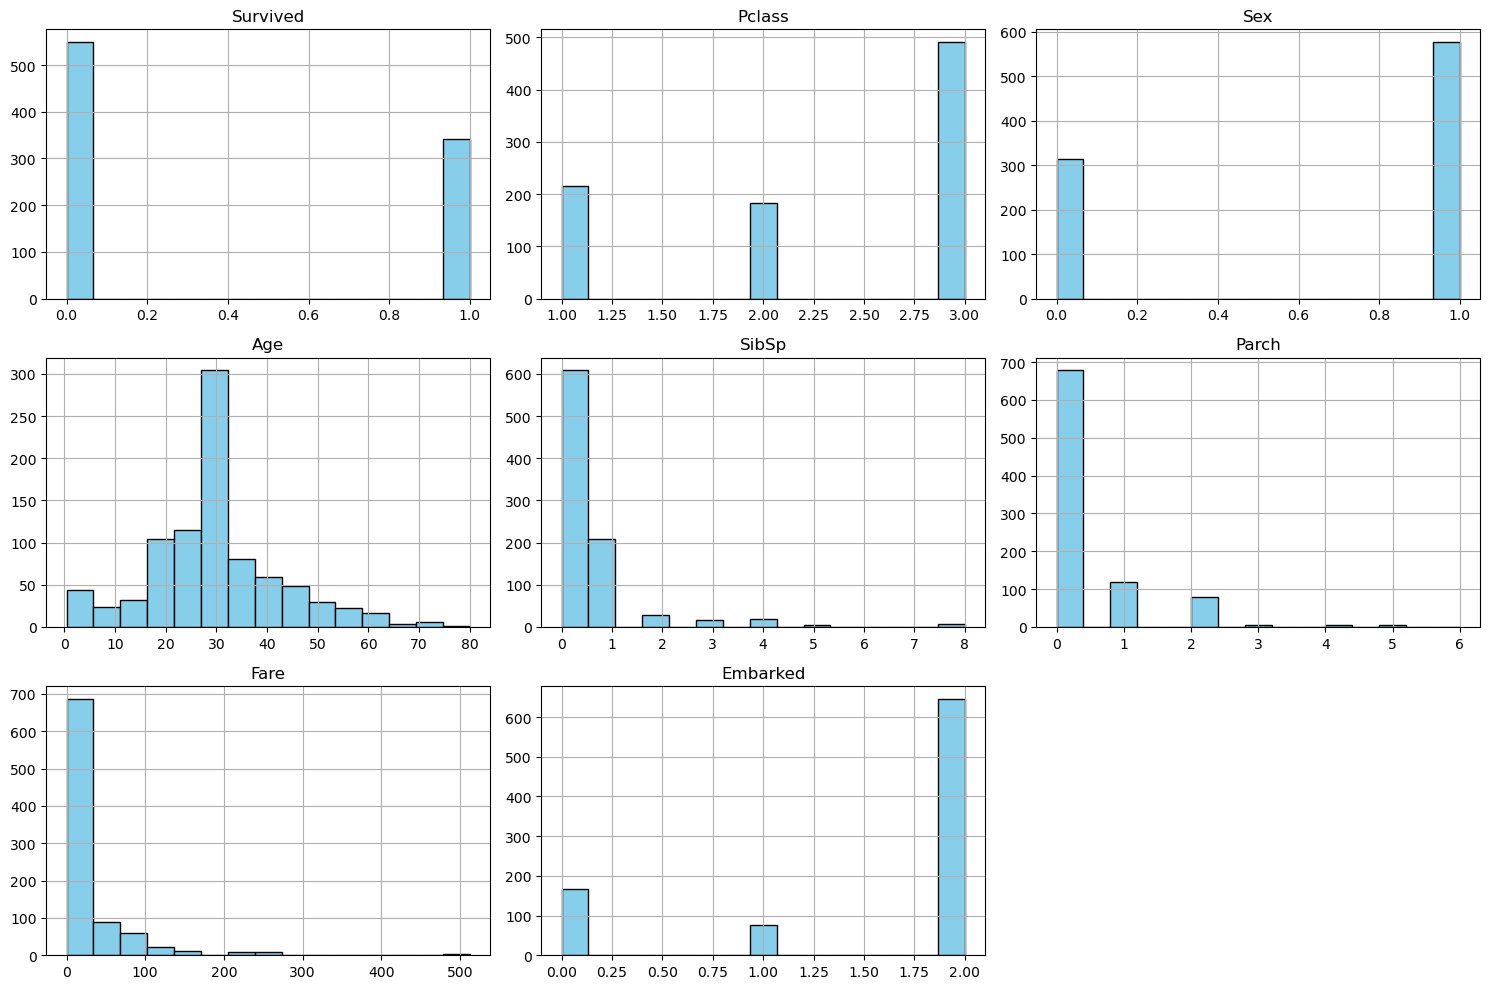

In [33]:
# Plot histograms for numerical features
titanic_data.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Feature and Target Definition
### X: Features used for prediction (all columns except Survived).
### y: The target variable (Survived), which indicates whether a passenger survived.

In [34]:
# Define features and target
X = titanic_data.drop(columns=["Survived"])  # Use all features except target
y = titanic_data["Survived"]  # Target variable


# Scaling Features
### Scale the features to ensure they have a mean of 0 and a standard deviation of 1. This is essential for distance-based algorithms like KNN.


In [35]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Convert Scaled Features to DataFrame
### After scaling the features using StandardScaler, the resulting X_scaled is a NumPy array, which is not as readable as a DataFrame.
### Purpose: Convert X_scaled back into a Pandas DataFrame using the original feature names for easier interpretation.
### Usage:This ensures you can view the scaled values for each feature with their respective column names.Use .head() to display the first few rows of the scaled features.


In [36]:
# Convert scaled features back to a DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled Features (first few rows):")
print(X_scaled_df.head())



Scaled Features (first few rows):
     Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0  0.827377  0.737695 -0.565736  0.432793 -0.473674 -0.502445  0.585954
1 -1.566107 -1.355574  0.663861  0.432793 -0.473674  0.786845 -1.942303
2  0.827377 -1.355574 -0.258337 -0.474545 -0.473674 -0.488854  0.585954
3 -1.566107 -1.355574  0.433312  0.432793 -0.473674  0.420730  0.585954
4  0.827377  0.737695  0.433312 -0.474545 -0.473674 -0.486337  0.585954


# Train-Test Split and Display Shapes
### Split the dataset into two subsets:
#### Training set (80%): Used to train the machine learning model.
#### Test set (20%): Used to evaluate the model’s performance on unseen data.
### train_test_split() Parameters:
#### test_size=0.2: Specifies that 20% of the data will be used as the test set.
#### random_state=42: Ensures reproducibility by setting a seed for random splitting.
### Shapes:
#### Use .shape to display the dimensions (rows and columns) of the training and test sets.


In [38]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [39]:
# Display the shapes of the splits
print("\nTraining and Testing Set Shapes:")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Training and Testing Set Shapes:
Training set shape: (712, 7)
Test set shape: (179, 7)


# Initialize and Train KNN Classifier
### Initialize the KNN classifier with 5 neighbors and Euclidean distance.
### Train the model on the training data (X_train, y_train).

In [40]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')


In [41]:
# Train the classifier
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

# Make Predictions
### Use the trained model to predict the target values for the test dataset.


In [42]:
# Make predictions
y_pred = knn_classifier.predict(X_test)


# Evaluate the Model
### Evaluate the model using the following:
#### Classification Report: Precision, recall, F1-score, and accuracy for each class.
#### Confusion Matrix: Displays true positives, true negatives, false positives, and false negatives.
#### ROC-AUC Score: Measures the model's ability to distinguish between classes (higher is better).


In [43]:
# Evaluate the model
print("\nClassification Evaluation Metrics:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")



Classification Evaluation Metrics:
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[89 16]
 [20 54]]
ROC-AUC Score: 0.79


# Visualize Confusion Matrix
### A heatmap is used to make the confusion matrix easier to interpret visually.
### Each cell in the heatmap corresponds to a value in the confusion matrix, with annotations to indicate the count of predictions.

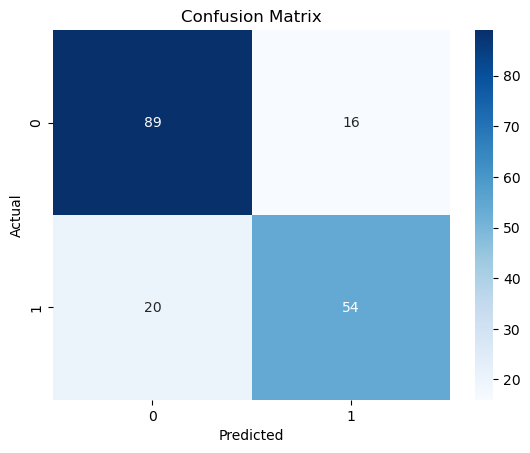

In [44]:
# Plot confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()